In [1]:
import os
from PIL import Image
import pandas as pd


## EDA

In [2]:
item_list = os.listdir('Data/Items')
non_item_list = os.listdir('Data/Random_Frames')

In [3]:
print('Number of non item frames', len(item_list))
print('Number of items', len(non_item_list))

Number of non item frames 189
Number of items 1878


#### Image examples

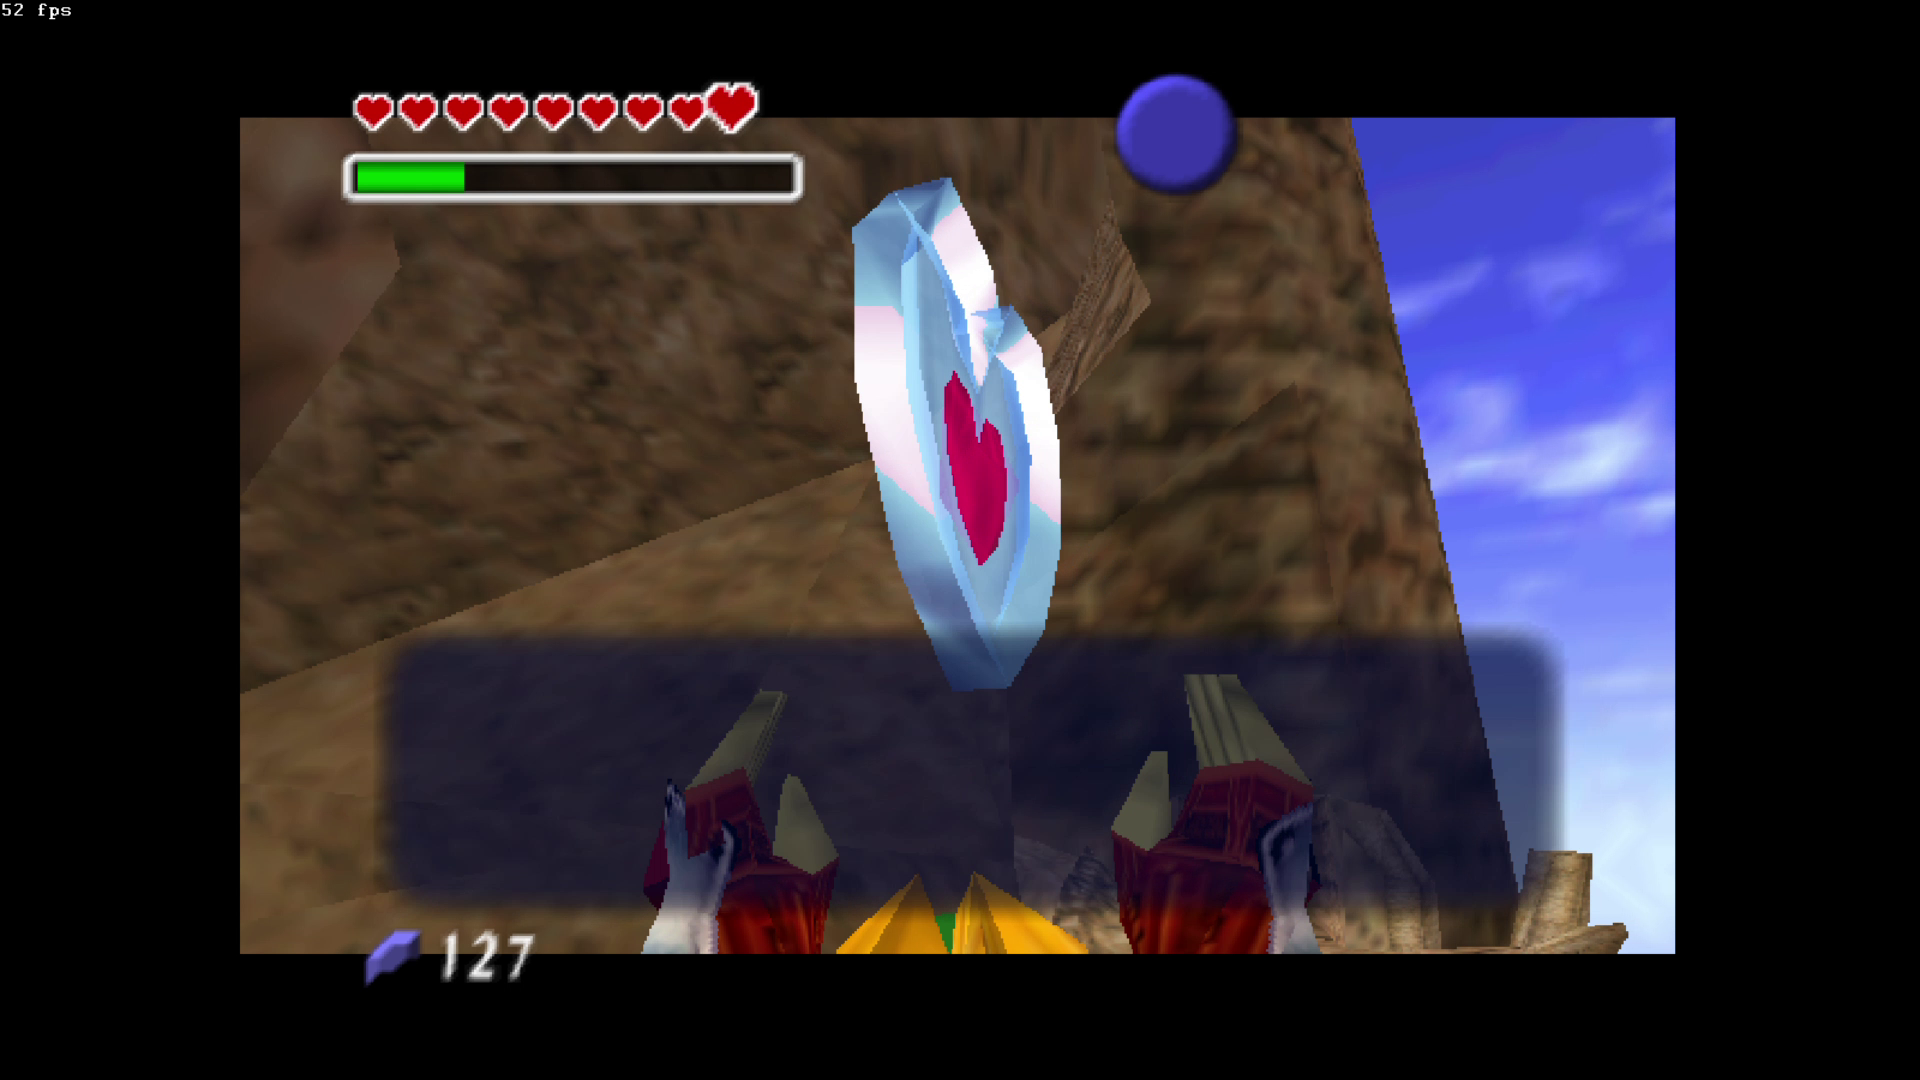

In [4]:
Image.open(os.path.join('Data/Items', item_list[8]))
#Example item image

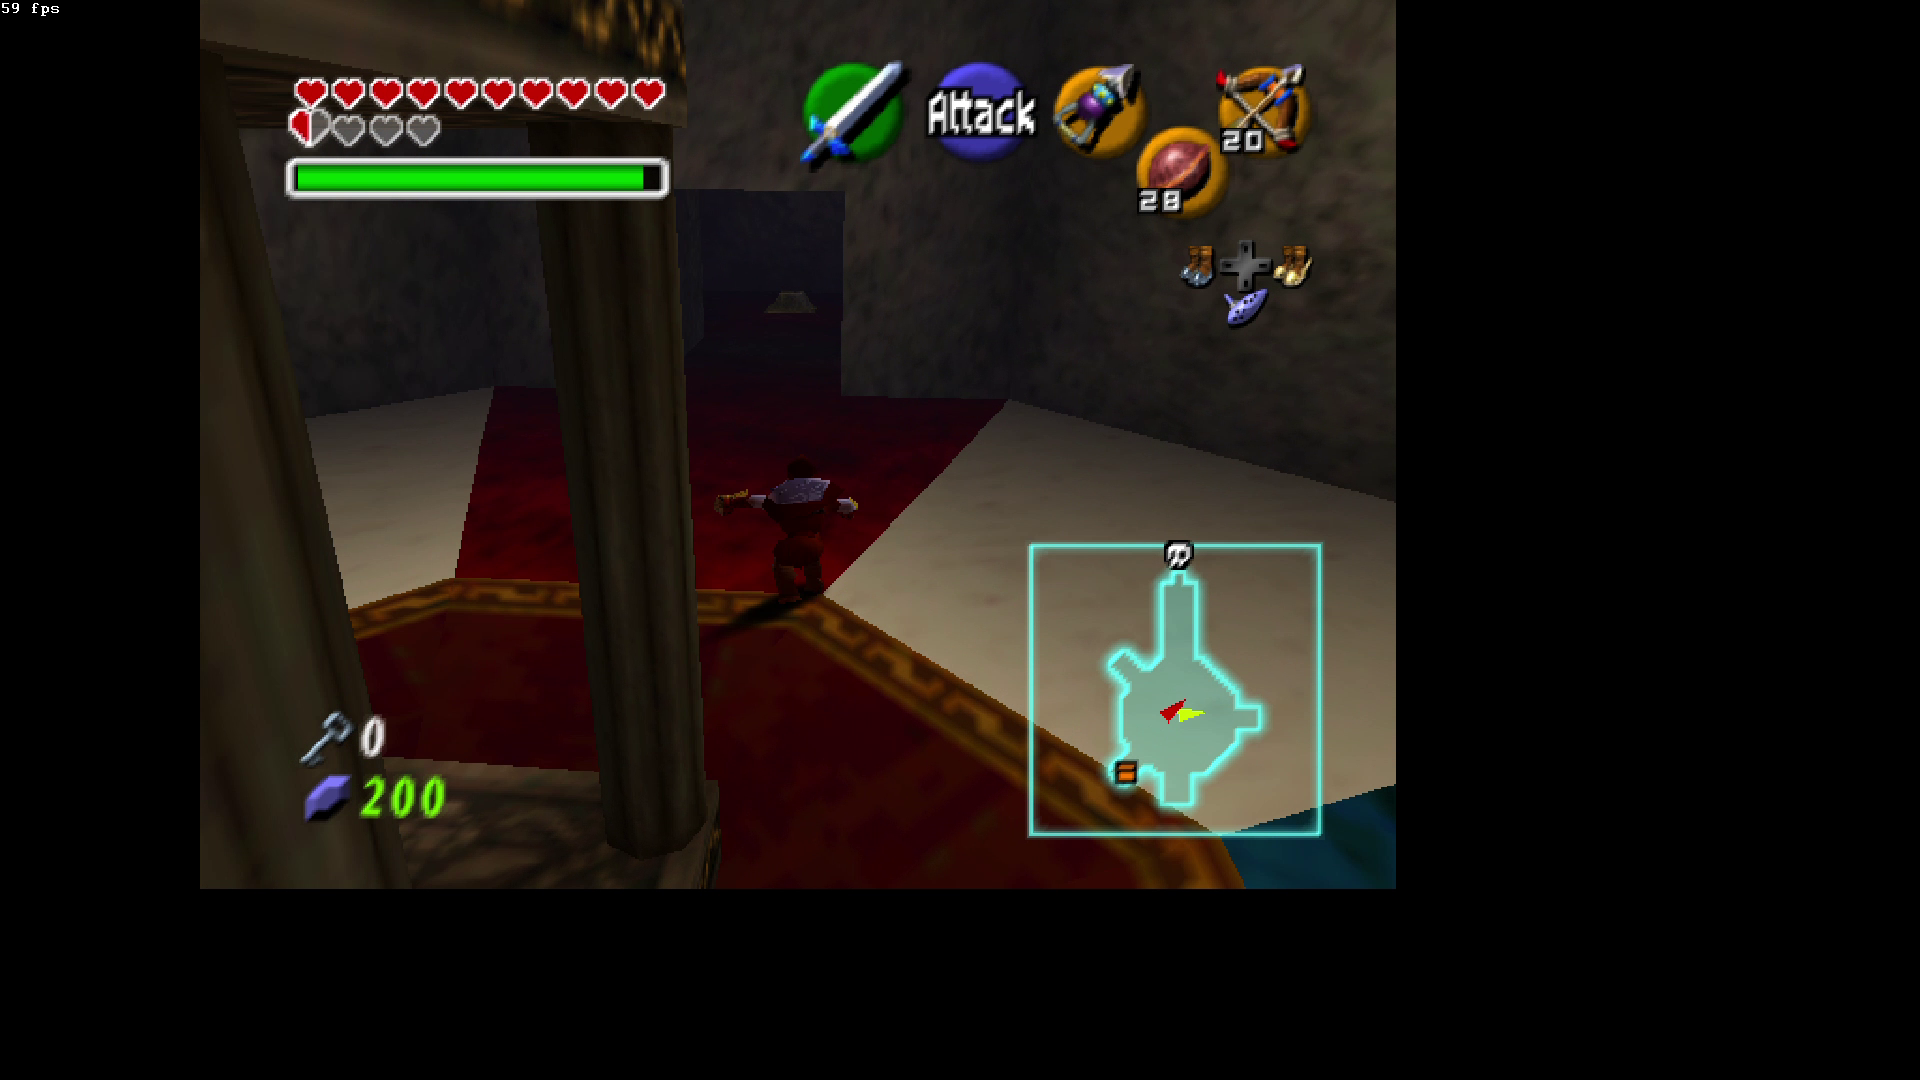

In [5]:
Image.open(os.path.join('Data/Random_Frames', non_item_list[8]))
#Example non-item image

#### Items types-locations

In [6]:
def name_splitter(img_name):
    return img_name.split('.')[0].split('_')

In [7]:
items_df = pd.DataFrame([name_splitter(img_name) for img_name in item_list], columns=['Main_loc', 'Subloc', 'Item', 'Text_box'])
items_df.head()
#Main loc is the main location where item was found
#Sub loc is the sublocation within main location where item was found, currently mostly just a repeat of 'Main_loc'
#Item is the name of the item found
#Text_box, when an item is caught a text box pops up. This column is either None, if the item frame captured the text box that accompanied it
#or 'nobox' if by chance it didn't (should be rarer). This nomenclature might be inconsistent across the images so some Nones might
# actually be noboxes

,Main_loc,Subloc,Item,Text_box
0,botw,botw,heartc,None
1,botw,botw,heartc,nobox
2,botw,botw,hookshot2,None
3,botw,botw,irons,None
4,botw,botw,smallkey,None


In [8]:
items_df.describe()
#Counts are not exhaustive, some items and locations might/will surely be missing from current data

,Main_loc,Subloc,Item,Text_box
count,189,189,189,42
unique,29,40,69,2
top,spirit,spirit,poh,nobox
freq,27,27,23,39


In [9]:
set(items_df['Text_box'].to_list())
#Extra values in 'Text_box' are just overloaded 'nobox' names 

{None, 'nobox', 'nobox (2)'}

In [10]:
(items_df['Main_loc'] == items_df['Subloc']).mean().item()
#For now subloc is mainly the same as main loc until some names are chosen for all sub locs

0.798941798941799

In [11]:
items_df.groupby('Main_loc')['Subloc'].nunique().to_frame('Distinct_sublocs').reset_index().sort_values('Distinct_sublocs', ascending=False).head()
#Most varied 'Main_loc' has five distinct sub locs

,Main_loc,Distinct_sublocs
17,kakariko,5
22,market,3
11,goronc,2
12,graveyard,2
2,collossus,2


In [12]:
set(items_df.loc[items_df['Main_loc'] == 'kakariko', 'Subloc'])
#One's a misspellling

{'anju', 'kakariko', 'kakario', 'roof', 'spiders'}

In [ ]:
items_df.groupby('Item').size().to_frame('Vol').reset_index().sort_values('Vol', ascending=False)
#Most common items: poh (piece of heart), blupee (blue rupee) and heartc (heart container)

,Item,Vol
37,poh,23
5,blupee,20
22,heartc,11
52,smallkey,10
43,recheart,9
...,...,...
61,stickcap,1
64,strength2,1
65,strength3,1
67,wegg,1
